In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv(r'F:\Class Assesments and In class -Imarticus\ML\linear\Linear Regression with SGD_Project\2 Project\Vehicle Performance Prediction\Dataset\data.csv')

In [3]:
df.head(4)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299


# Data Preparation

In [4]:
df.shape

(398, 9)

In [5]:
df.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [6]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [7]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df = df[~(df['horsepower']=='?')]

In [9]:
df.shape

(392, 9)

In [10]:
df['horsepower'] = df['horsepower'].astype('float')

In [11]:
df['origin'] = df['origin'].astype('object')

In [12]:
df.dtypes

origin                  object
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [13]:
# splitting the name in car name and model

df[['car_model','car_name']] = df['name'].str.split(" ",n=1,expand=True)
df.drop('name',axis=1,inplace=True)
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,car_model,car_name
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [14]:
print(sorted(df['car_model'].unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [15]:
df['car_model'] = df['car_model'].replace(['chevroelt','chevy'],'chevrolet')
df['car_model'] = df['car_model'].replace(['toyouta'],'toyota')
df['car_model'] = df['car_model'].replace(['maxda'],'mazda')
df['car_model'] = df['car_model'].replace(['mercedes-benz'],'mercedes')
df['car_model'] = df['car_model'].replace(['vw','vokswagen'],'volkswagen')

In [16]:
print(sorted(df['car_model'].unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


In [17]:
df.car_name.head(10)

0    chevelle malibu
1        skylark 320
2          satellite
3          rebel sst
4             torino
5        galaxie 500
6             impala
7           fury iii
8           catalina
9     ambassador dpl
Name: car_name, dtype: object

In [18]:
import re
def lettnum(x):
    return re.sub('[^A-Za-z0-9]+','',(str(x)))

df['car_name'] = df['car_name'].apply(lambda x: lettnum(x))

In [19]:
len(df['car_name'].unique())

293

# Statistical Summary

In [20]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [21]:
df.describe(include='object')

,origin,car_model,car_name
count,392,392,392
unique,3,30,293
top,1,ford,rabbit
freq,245,48,5


# EDA

<Figure size 1296x1296 with 0 Axes>

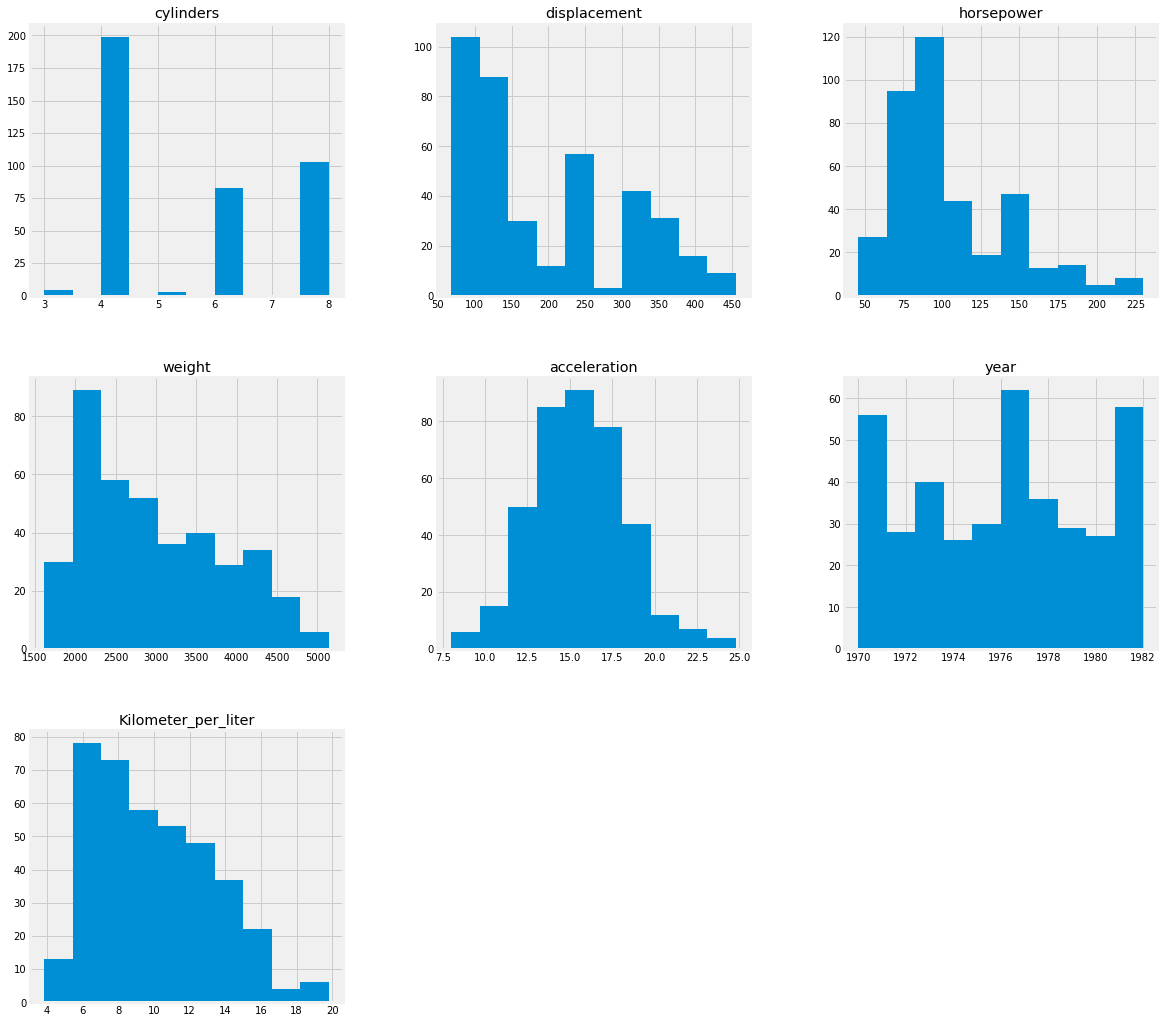

In [22]:
plt.figure(figsize=(18,18))
df.hist(figsize=(18,18));

### Analysing all Features Specifically(Univariate Analysis)

In [23]:
#1.Kilometer per litre
df.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

Max of Mileage of car present in dataset is 19.81 and Minimum is 3.82

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

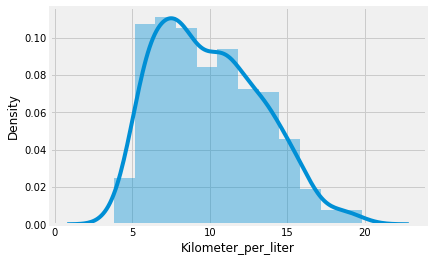

In [24]:
sns.distplot(df['Kilometer_per_liter'])

In [25]:
# Checking skewnewss of target var

from scipy.stats import skew
skew(df['Kilometer_per_liter'])

0.45534138282810327

In [26]:
df1 = df.copy()

In [27]:
# Since the Target Var is not normally distributed , let's try to remove the skewness from var

df1['log_mileage'] = np.log(df1['Kilometer_per_liter'])
df1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,car_model,car_name,log_mileage
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

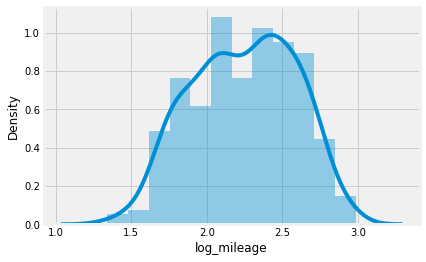

In [28]:
sns.distplot(df1['log_mileage'])

In [29]:
skew(df1['log_mileage'])

-0.13087844685472316

<AxesSubplot:xlabel='displacement', ylabel='Density'>

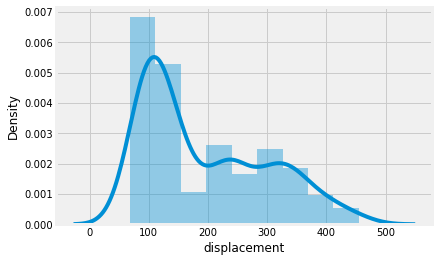

In [30]:
#2. Displacement
sns.distplot(df1['displacement'])

<AxesSubplot:xlabel='year', ylabel='count'>

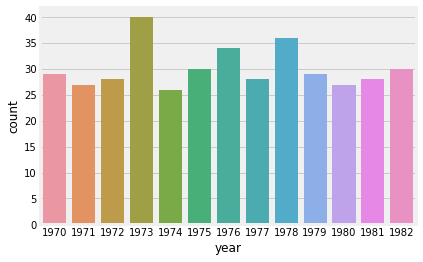

In [31]:
# 3 year
sns.countplot(df1['year'])

Most cars manufactured in 1973

<AxesSubplot:xlabel='origin', ylabel='count'>

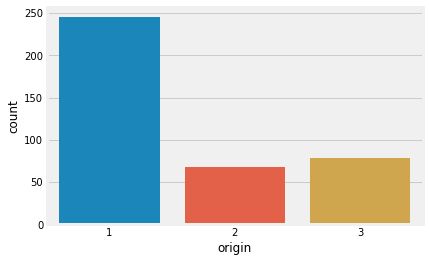

In [32]:
# 4.origin
sns.countplot(df1['origin'])

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

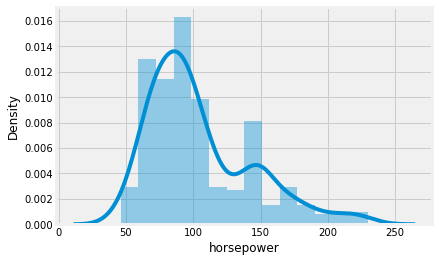

In [33]:
#5 horsepower

sns.distplot(df1['horsepower'])

Most Vehicles have HP of 70-100

<AxesSubplot:xlabel='weight', ylabel='Density'>

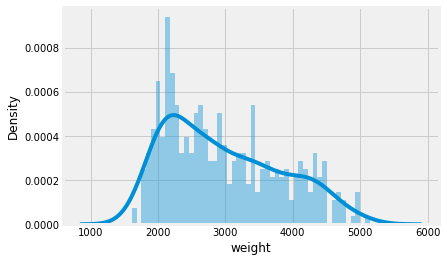

In [34]:
#6 Weight
sns.distplot(df1['weight'],bins=50)

Most Cars have Weight of 2000-2500

<AxesSubplot:xlabel='cylinders', ylabel='Density'>

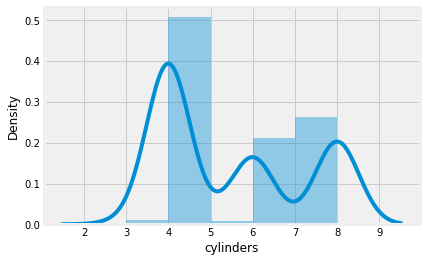

In [35]:
#7 cylinders
sns.distplot(df1['cylinders'])

Most cars have 4-5 Cylinders

In [36]:
# 8 Top 10 car_model
carmodel = df1.car_model.value_counts()[:10]
carmodel

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
Name: car_model, dtype: int64

In [37]:
df1.car_model.nunique()

30

There are total 30 different Car Companies are present in dataset

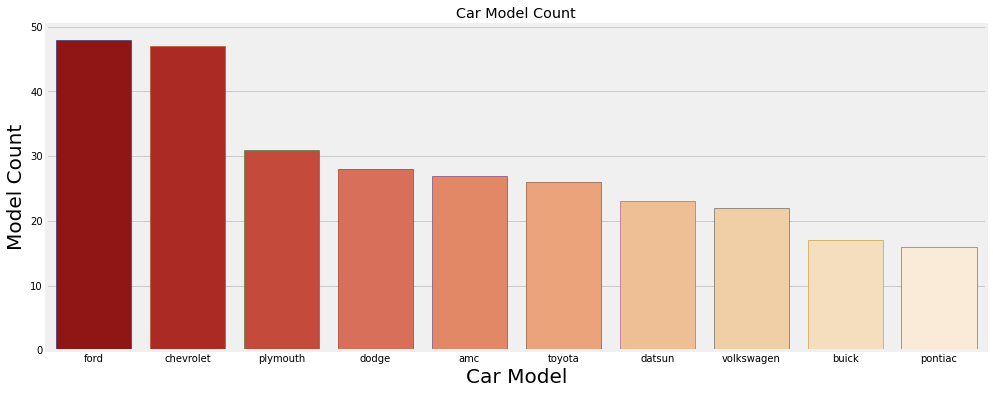

In [38]:
carmodel=list(df1.car_model.value_counts()[:10].index)
carmodel_count = list(df1.car_model.value_counts()[:10])

plt.subplots(figsize=(15,6))
sns.barplot(x=carmodel, y=carmodel_count, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.title('Car Model Count')
plt.xlabel("Car Model",fontsize=20)
plt.ylabel("Model Count",fontsize=20)
plt.show()

Most cars of Ford Model

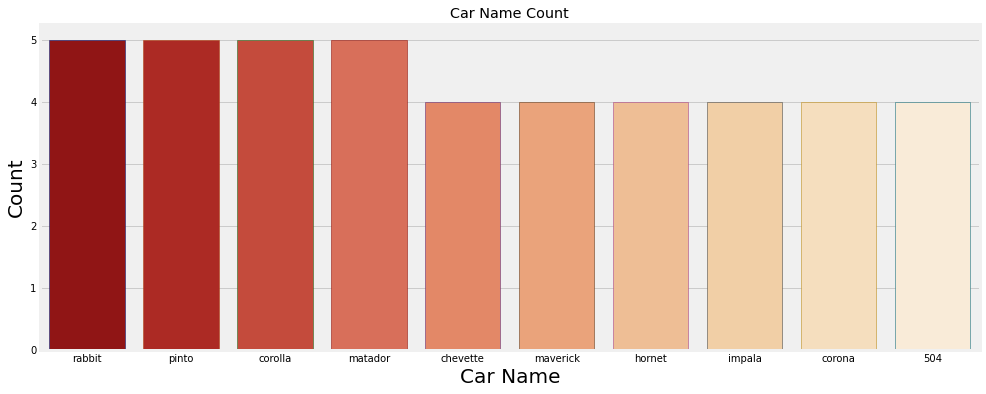

In [39]:
# 9 car name
carname=list(df1.car_name.value_counts()[:10].index)
car_count = list(df1.car_name.value_counts()[:10])

plt.subplots(figsize=(15,6))
sns.barplot(x=carname, y=car_count, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.title('Car Name Count')
plt.xlabel("Car Name",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

Most cars are of type Rabbit,pinto,corolla and Matador(5)

<AxesSubplot:xlabel='acceleration', ylabel='Density'>

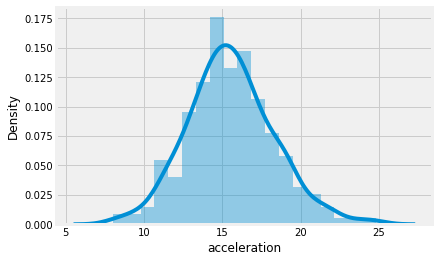

In [40]:
# 10 acceleration
sns.distplot(df1['acceleration'])

Most cars have accn between 14-17

### Analysing Each Feature with Target Variable(Mileage) (Multi Variate Analysis)

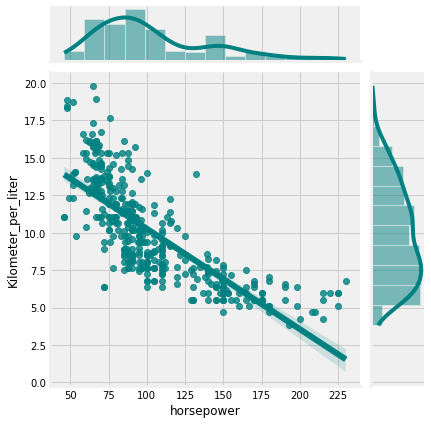

In [41]:
# 1.HP Vs Kilometer per liter

sns.jointplot(df1['horsepower'],df1['Kilometer_per_liter'],kind='reg',color='teal')

As hp is increasing Mileage is decreasing

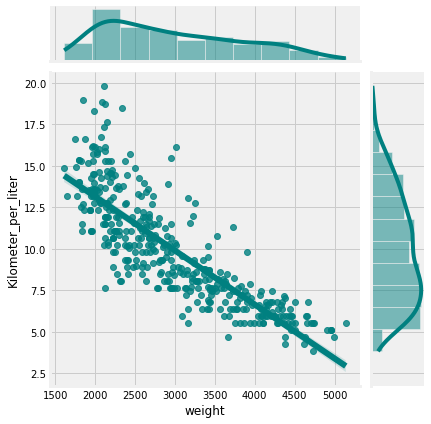

In [42]:
# 2. Weight Vs Kilometer per liter
sns.jointplot(df1['weight'],df1['Kilometer_per_liter'],kind='reg',color='teal')

As Weight of car is increasing Mileage is decreasing

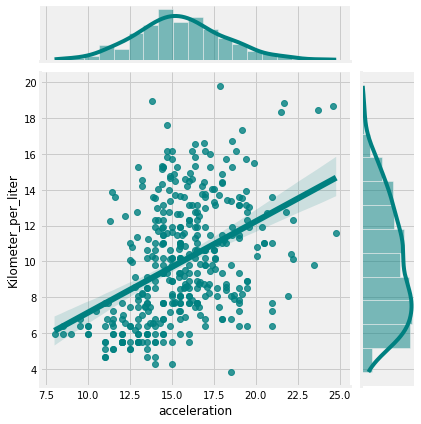

In [43]:
# 3. Acceleration Vs Kilometer per liter
sns.jointplot(df1['acceleration'],df1['Kilometer_per_liter'],kind='reg',color='teal')

From the plot we can see that Acceleration doesn't have much of a impact on Mileage

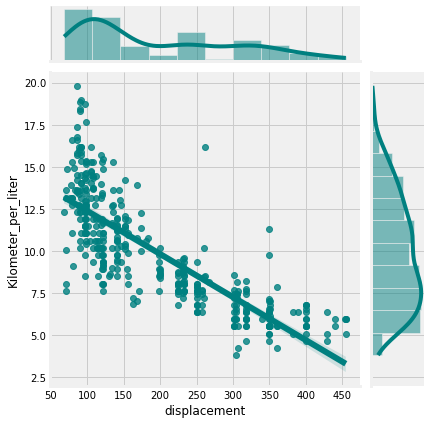

In [44]:
# 4. Displacement Vs Kilometer per liter
sns.jointplot(df1['displacement'],df1['Kilometer_per_liter'],kind='reg',color='teal')

As Displacement of car is increasing Mileage is decreasing

<AxesSubplot:xlabel='cylinders', ylabel='Kilometer_per_liter'>

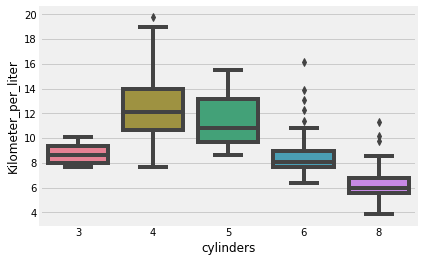

In [45]:
# 5. cylinders Vs Kilometer per liter
sns.boxplot(df1['cylinders'],df1['Kilometer_per_liter'],palette='husl')

Mileage of Car having 4 Cylinders is maximum and 8 is least

In [103]:
# 6. Cal Company vs Car Name Vs Kilometer per liter
df1[['car_model','car_name','year','cylinders','Kilometer_per_liter','horsepower']].sort_values(by='Kilometer_per_liter',ascending=False)

,car_model,car_name,year,cylinders,Kilometer_per_liter,horsepower
322,mazda,glc,1980,4,19.811697,65.0
329,honda,civic1500gl,1980,4,18.961409,67.0
325,volkswagen,rabbitcdiesel,1980,4,18.833866,48.0
394,volkswagen,pickup,1982,4,18.706323,52.0
326,volkswagen,dasherdiesel,1980,4,18.451237,48.0
...,...,...,...,...,...,...
103,chevrolet,impala,1973,8,4.676581,150.0
27,dodge,d200,1970,8,4.676581,210.0
26,chevrolet,c20,1970,8,4.251437,200.0
25,ford,f250,1970,8,4.251437,215.0


In [102]:
ford = df[df1['car_model']=='ford'][['car_name','cylinders','horsepower','Kilometer_per_liter']].sort_values(by='Kilometer_per_liter',ascending=False)[:10]
ford

,car_name,cylinders,horsepower,Kilometer_per_liter
245,fiesta,4,66.0,15.347688
351,escort4w,4,65.0,14.624944
352,escort2h,4,65.0,12.711797
396,ranger,4,79.0,11.904024
393,mustanggl,4,86.0,11.478880
206,pinto,4,72.0,11.266308
314,fairmont,4,88.0,11.223794
130,pinto,4,80.0,11.053736
236,mustangii22,4,89.0,10.841165
255,fairmontman,4,88.0,10.671107


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

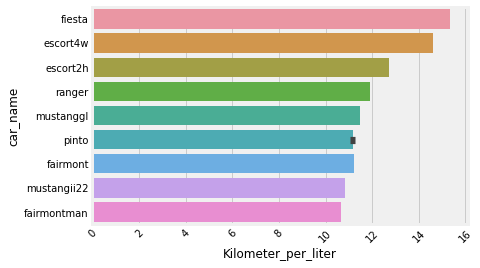

In [101]:
sns.barplot(y=ford['car_name'],x=ford['Kilometer_per_liter'])
plt.xticks(rotation=45)

In [116]:
mazda_ford = df1[(df1['car_name']=='glc')|(df1['car_name']=='fiesta')]
columns=['car_model', 'car_name','origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter',
       'log_mileage']


In [119]:
mazda_ford.loc[:,columns]

,car_model,car_name,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,log_mileage
245,ford,fiesta,1,4,98.0,66.0,1800,14.4,1978,15.347688,2.730965
322,mazda,glc,3,4,86.0,65.0,2110,17.9,1980,19.811697,2.986273


<AxesSubplot:xlabel='year', ylabel='Kilometer_per_liter'>

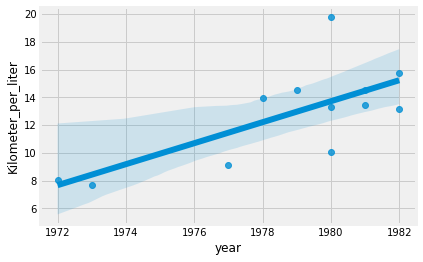

In [58]:
sns.regplot(mazda['year'],mazda['Kilometer_per_liter'])

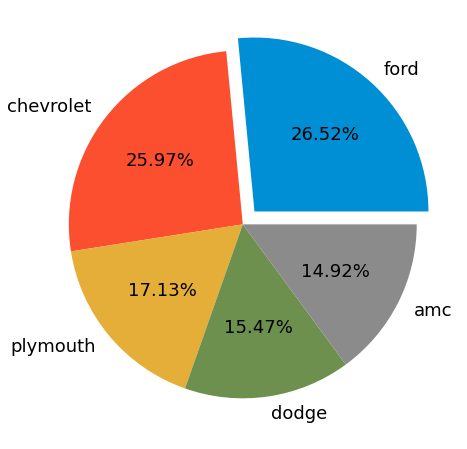

In [89]:
plt.figure(figsize=(12,8))
explode = [0.1,0,0,0,0]
plt.pie(carmodel_count[:5],explode=explode,labels = df1.car_model.value_counts().keys()[:5],autopct="%.2f%%"
        ,textprops={'fontsize':18});

In [73]:
df1.car_model.value_counts().keys()

Index(['ford', 'chevrolet', 'plymouth', 'dodge', 'amc', 'toyota', 'datsun',
       'volkswagen', 'buick', 'pontiac', 'honda', 'mazda', 'mercury',
       'oldsmobile', 'fiat', 'peugeot', 'audi', 'volvo', 'chrysler', 'saab',
       'opel', 'subaru', 'mercedes', 'renault', 'cadillac', 'bmw', 'capri',
       'hi', 'triumph', 'nissan'],
      dtype='object')

glc car of Mazda has the highest Mileage with 19.81 km/l

1200d of hi has least Mileage with 3.82 km/l

<AxesSubplot:xlabel='year', ylabel='Kilometer_per_liter'>

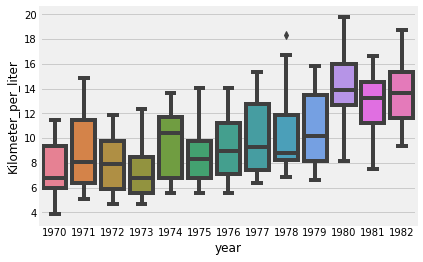

In [47]:
# 7. year Vs Kilometer per liter
sns.boxplot(df1['year'],df1['Kilometer_per_liter'],palette='husl')

Mileage of car increased year by year

# Correlation

In [120]:
data = df1.drop(['cylinders','Kilometer_per_liter','log_mileage','origin'],axis=1)
corr = data.corr()
corr

,displacement,horsepower,weight,acceleration,year
displacement,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<AxesSubplot:>

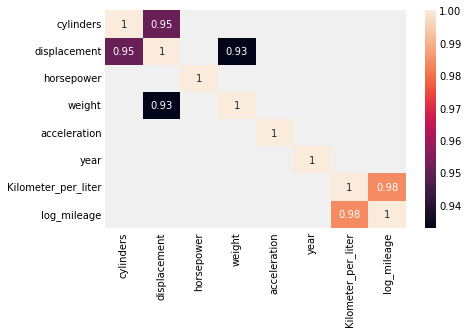

In [123]:
x = df1.corr()
sns.heatmap(x[x>0.9],annot=True)

By looking at it We can see Displacemrnt,HP,Weight have strong correlation with each other . We should not select these features together to train model
.As one of the assumption of Linear Regression was Multi Colinearity shouldn't exist

In [49]:
df_final = df1.drop(['weight','displacement','car_model','car_name'],axis=1)
df_final.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885


### Feature Engineering

In [50]:
df_final['cylinders'] = df_final['cylinders'].astype('object')

In [51]:
# One Hot Encoding
df_final = pd.get_dummies(df_final,drop_first=True) # with 2 we can represent all three origins
df_final.head()

,horsepower,acceleration,year,Kilometer_per_liter,log_mileage,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,0,0,0,0,0,1


In [52]:
# Standarising the data

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = df_final.drop(['Kilometer_per_liter','log_mileage'],axis=1)
mms.fit(x)
X=mms.fit_transform(x)

# Model Building

In [53]:
X
y = df_final['log_mileage']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=19)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(313, 9) (79, 9) (313,) (79,)


In [55]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor
from xgboost import XGBRegressor

In [56]:
model_params = {
    'SGDRegressor':{
        'model':SGDRegressor(),
        'params':{
            'loss':['squared_error','huber'],
            'penalty':['l2', 'l1', 'elasticnet'],
            'alpha':[0.0001,0.001],
            'max_iter':[1000,1500,2000,2500,3000,3500,4000]
       }
   },
    'XGBRegressor':{
        'model':XGBRegressor(),
        'params':{
            'booster':['gbtree', 'gblinear'],
            'n_estimators':[int(x) for x in np.linspace(100,1000,10)],
            'max_leaves':[0,1,2,3,4,5,6],
            'max_depth':[int(x) for x in np.linspace(1,10,10)]
       }
   }

}
    

In [57]:
scores = []
for model_name,mp in model_params.items():
    rf = RandomizedSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False,random_state=100,n_iter=5
                           ,n_jobs=-1,verbose=2)
    rf.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':rf.best_score_,
        'best_params':rf.best_params_
    })

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [58]:
df_comp = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_comp

,model,best_score,best_params
0,SGDRegressor,0.653023,"{'penalty': 'l2', 'max_iter': 2500, 'loss': 's..."
1,XGBRegressor,0.853357,"{'n_estimators': 400, 'max_leaves': 5, 'max_de..."


In [59]:
df_comp.to_csv(r'C:\Users\Lenovo\Machine Learning\Linear Regression Projects\results.csv')

In [60]:
rf.best_params_

{'n_estimators': 400, 'max_leaves': 5, 'max_depth': 1, 'booster': 'gbtree'}

In [62]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [66]:
SGD = SGDRegressor(penalty='l2',max_iter= 2500,loss='squared_error',alpha= 0.001,random_state=100)
SGD.fit(x_train,y_train)
predictions = SGD.predict(x_test)

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)


print('MAE: ',MAE)
print('MSE: ',MSE)

MAE:  0.1291501270295562
MSE:  0.02867507373389792


In [71]:
from sklearn import metrics
r2_score = metrics.r2_score(y_test,predictions)
r2_score

0.7621289047681026

In [63]:
xgb = XGBRegressor(booster='gbtree',max_depth=1, max_leaves=5,n_estimators= 400,random_state=100)
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)
r2_score = r2_score(y_test,predictions)
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)

print('R2_score: ',r2_score)
print('MAE: ',MAE)
print('MSE: ',MSE)

R2_score:  0.9276430499128431
MAE:  0.07193379674724928
MSE:  0.0087225430937141
